<a href="https://colab.research.google.com/github/RayanTech/Find_Lanes_for_Self-Driving_Cars/blob/main/Find_Lanes_for_Self_Driving_Cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [5]:
image = cv2.imread('/content/drive/MyDrive/ColabNotebooks/Find-Lanes-for-Self-Driving-Cars/test_image.jpg')
l_img = np.copy(image)

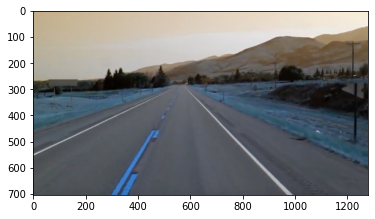

In [6]:
plt.imshow(image)
plt.show()

In [7]:
def canny(image):
  gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  blur = cv2.GaussianBlur(gray, (5,5),0)
  canny = cv2.Canny(blur, 50, 150)
  return canny

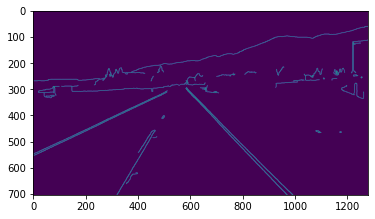

In [8]:
plt.imshow(canny(image))
plt.show()

In [9]:
def display_lines(image,lines):
  line_image = np.zeros_like(image)
  if lines is not None:
    for line in lines:
      x1,y1,x2,y2 = line.reshape(4)
      cv2.line(line_image, (x1,y1),(x2,y2),(255,0,0), 10)
  return line_image

In [10]:
def region_of_interest(image):
  height = image.shape[0]
  polygons = np.array([
  [(200,height), (1100, height),(550, 250)]
   ])
  mask = np.zeros_like(image)
  cv2.fillPoly(mask, polygons, 255)
  masked_img = cv2.bitwise_and(image,mask)
  return masked_img

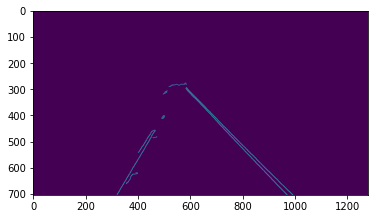

In [11]:
canny_img = canny(l_img)
cropped_img = region_of_interest(canny_img)
lines = cv2.HoughLinesP(cropped_img, 2,np.pi/180,100 ,np.array([]), minLineLength=40, maxLineGap = 5)
plt.imshow(cropped_img)
plt.show()

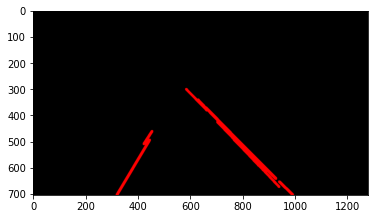

In [12]:
line_image = display_lines(l_img, lines)
plt.imshow(line_image)
plt.show()

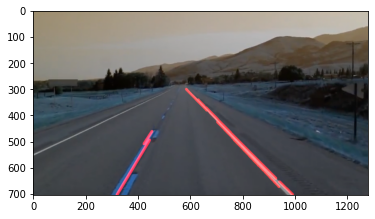

In [13]:
c_image = cv2.addWeighted(l_img, 0.8, line_image, 1 , 1)
plt.imshow(c_image)
plt.show()

In [14]:
def average_slope_intercept(image,lines):
    left_fit = []
    right_fit = []
    for line in lines:
        x1, y1, x2, y2 = line.reshape(4)
        parameters = np.polyfit((x1, x2), (y1, y2), 1)
        slope = parameters[0]
        intercept = parameters[1]
        if slope < 0:
            left_fit.append((slope,intercept))
        else:
            right_fit.append((slope,intercept))
    left_fit_average = np.average(left_fit,axis = 0)
    right_fit_average = np.average(right_fit,axis = 0)
    left_line = make_coordinates(image,left_fit_average)
    right_line = make_coordinates(image,right_fit_average)
    return np.array([left_line,right_line])

In [15]:
def make_coordinates(image,line_parameters):
    slope,intercept = line_parameters
    y1 = image.shape[0]
    y2 = int(y1*(3/5))
    x1 = int((y1 - intercept)/slope)
    x2 = int((y2 - intercept)/slope)
    return np.array([x1,y1,x2,y2])

In [16]:
def display_lines(image, lines):
    line_image = np.zeros_like(image)
    if lines is not None:
        #for line in lines:
        for line in lines:
            x1, y1, x2, y2 = line.reshape(4)
            #for x1, y1, x2, y2 in x:    
            cv2.line(line_image,(x1, y1), (x2, y2), (0, 255 , 255), 10)
    return line_image

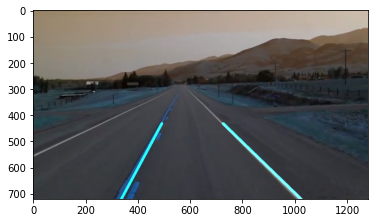

In [30]:
 cap = cv2.VideoCapture("/content/drive/MyDrive/ColabNotebooks/Find-Lanes-for-Self-Driving-Cars/test2.mp4")
 while(cap.isOpened()):
     _,frame = cap.read()
     canny_image = canny(frame)
     cropped_image = region_of_interest(canny_image)
     lines = cv2.HoughLinesP(cropped_image, 2, np.pi/180, 70, np.array([]), minLineLength = 40, maxLineGap = 5)
     averaged_lines = average_slope_intercept(frame,lines)
     line_image = display_lines(frame, averaged_lines)
     combo_image = cv2.addWeighted(frame, 0.8, line_image, 1, 1)
     plt.imshow(combo_image) 
     plt.show()
     cap.release()
